## Hate Crimes Analysis 

The following analysis will look at determinants of hate crimes in the U.S.

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [77]:
import pandas as pd
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/hate-crimes/hate_crimes.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [78]:
df.head(10)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986
5,Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.390523,2.804689
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701
7,Delaware,57522,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754,1.469980
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521,0.698070


In [79]:
# df contains 51 rows and 12 columns 
df.shape 

(51, 12)

In [80]:
df.count() 

state                                       51
median_household_income                     51
share_unemployed_seasonal                   51
share_population_in_metro_areas             51
share_population_with_high_school_degree    51
share_non_citizen                           48
share_white_poverty                         51
gini_index                                  51
share_non_white                             51
share_voters_voted_trump                    51
hate_crimes_per_100k_splc                   47
avg_hatecrimes_per_100k_fbi                 50
dtype: int64

In [81]:
df = df.drop_duplicates()
df.head(5)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [82]:
df.shape # no duplicates present 

(51, 12)

In [83]:
df.describe()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
count,51.000000,51.000000,51.000000,51.000000,48.000000,51.000000,51.000000,51.000000,51.00000,47.000000,50.000000
mean,55223.607843,0.049569,0.750196,0.869118,0.054583,0.091765,0.453765,0.315686,0.49000,0.304093,2.367613
std,9208.478170,0.010698,0.181587,0.034073,0.031077,0.024715,0.020891,0.164915,0.11871,0.252709,1.714245
min,35521.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.04000,0.067447,0.266941
25%,48657.000000,0.042000,0.630000,0.840500,0.030000,0.075000,0.440000,0.195000,0.41500,0.142707,1.293139
50%,54916.000000,0.051000,0.790000,0.874000,0.045000,0.090000,0.454000,0.280000,0.49000,0.226197,1.987068
75%,60719.000000,0.057500,0.895000,0.898000,0.080000,0.100000,0.466500,0.420000,0.57500,0.356935,3.184344
max,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.810000,0.70000,1.522302,10.953480


In [84]:
# Total missing values 
print(df.isnull().sum())

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
dtype: int64


In [85]:
# Dataset without any missing values for 3 variables by removing them 
dataset = df.fillna(method='ffill')

In [86]:
dataset.tail()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
46,Virginia,66155,0.043,0.89,0.866,0.06,0.07,0.459,0.38,0.45,0.363249,1.724755
47,Washington,59068,0.052,0.86,0.897,0.08,0.09,0.441,0.31,0.38,0.677488,3.817740
48,West Virginia,39552,0.073,0.55,0.828,0.01,0.14,0.451,0.07,0.69,0.328677,2.037054
49,Wisconsin,58080,0.043,0.69,0.898,0.03,0.09,0.430,0.22,0.48,0.226197,1.121945
50,Wyoming,55690,0.040,0.31,0.918,0.02,0.09,0.423,0.15,0.70,0.226197,0.266941


In [87]:
dataset.shape

(51, 12)

## Exploratory Data Analysis 

### Distributions 

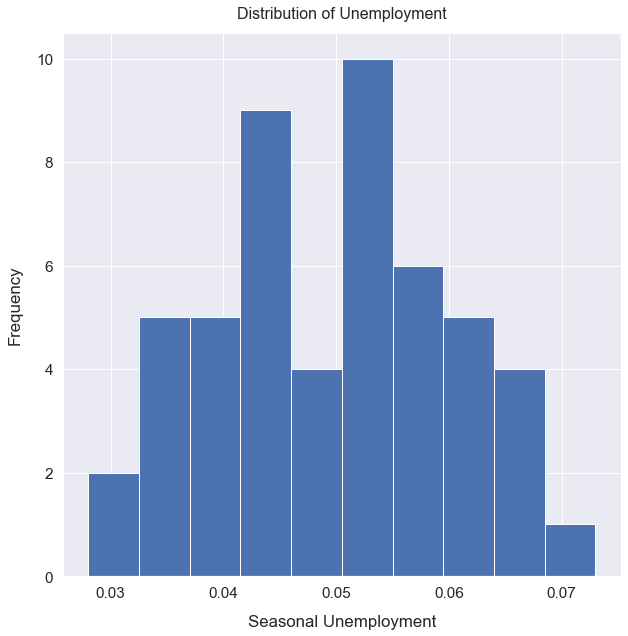

In [88]:
sns.set(font_scale=1.4)
df['share_unemployed_seasonal'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Seasonal Unemployment", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Unemployment", y=1.015, fontsize=16);

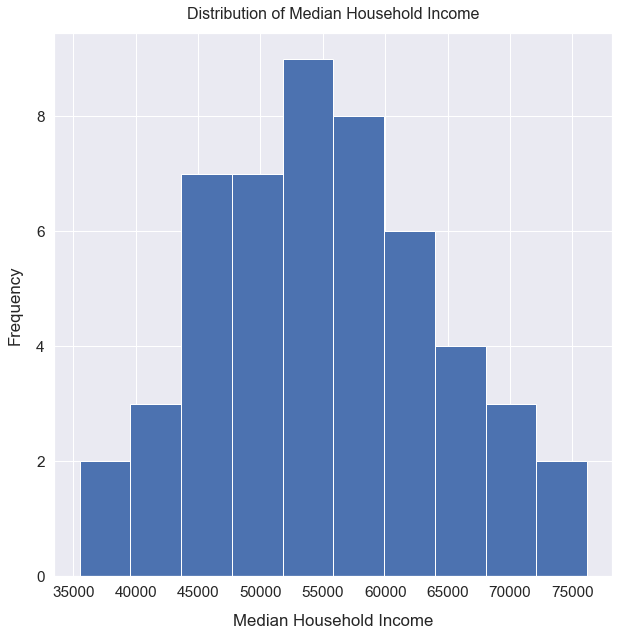

In [89]:
sns.set(font_scale=1.4)
df['median_household_income'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Median Household Income", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Median Household Income", y=1.015, fontsize=16);

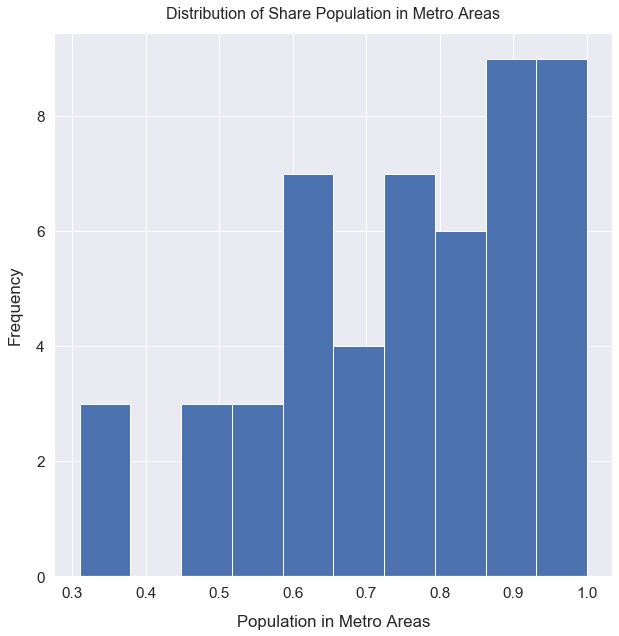

In [90]:
sns.set(font_scale=1.4)
df['share_population_in_metro_areas'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Population in Metro Areas", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Share Population in Metro Areas", y=1.015, fontsize=16);

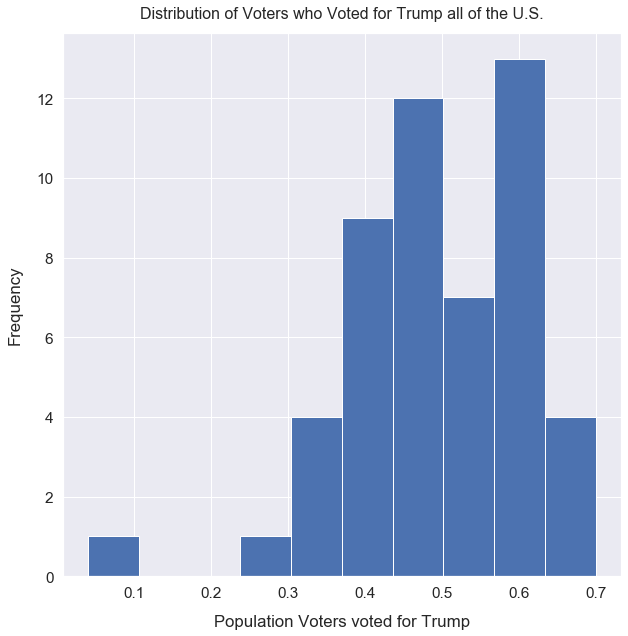

In [91]:
sns.set(font_scale=1.4)
df['share_voters_voted_trump'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Population Voters voted for Trump", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Voters who Voted for Trump all of the U.S.", y=1.015, fontsize=16);

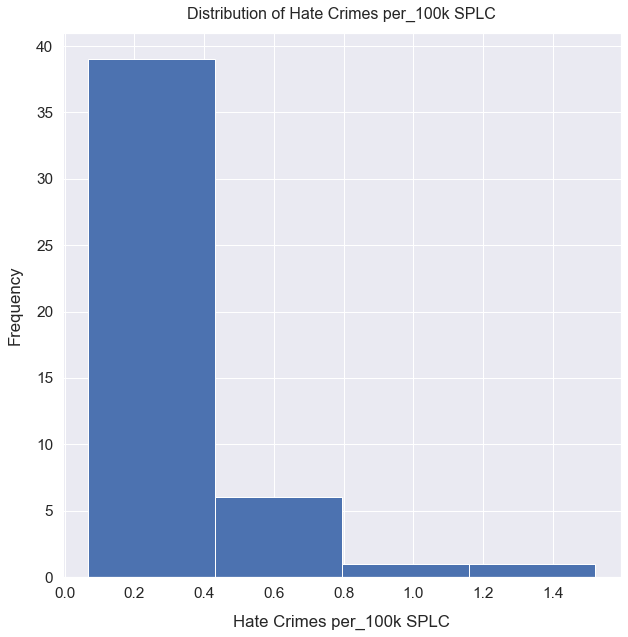

In [102]:
sns.set(font_scale=1.4)
df['hate_crimes_per_100k_splc'].plot(kind='hist', figsize=(10, 10), bins=4);
plt.xlabel("Hate Crimes per_100k SPLC", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Hate Crimes per_100k SPLC", y=1.015, fontsize=16);

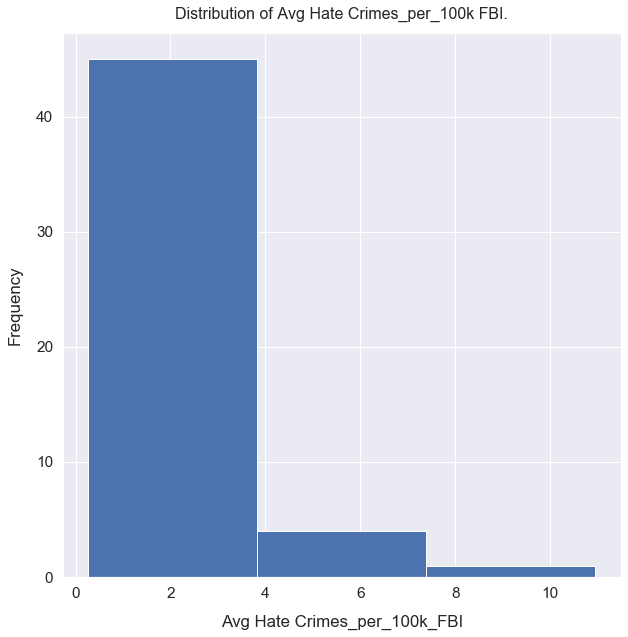

In [108]:
sns.set(font_scale=1.4)
df['avg_hatecrimes_per_100k_fbi'].plot(kind='hist', figsize=(10, 10), bins=3);
plt.xlabel("Avg Hate Crimes_per_100k_FBI", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Avg Hate Crimes_per_100k FBI.", y=1.015, fontsize=16);

### Correlation Heatmap

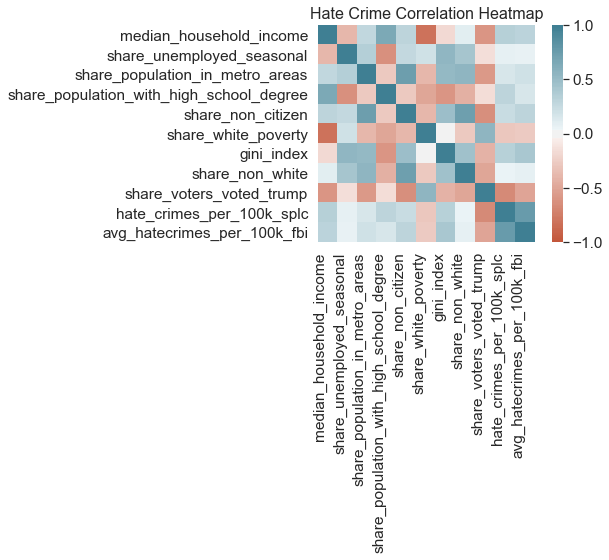

In [90]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
);
plt.title("Hate Crime Correlation Heatmap", y=1.015, fontsize=16);

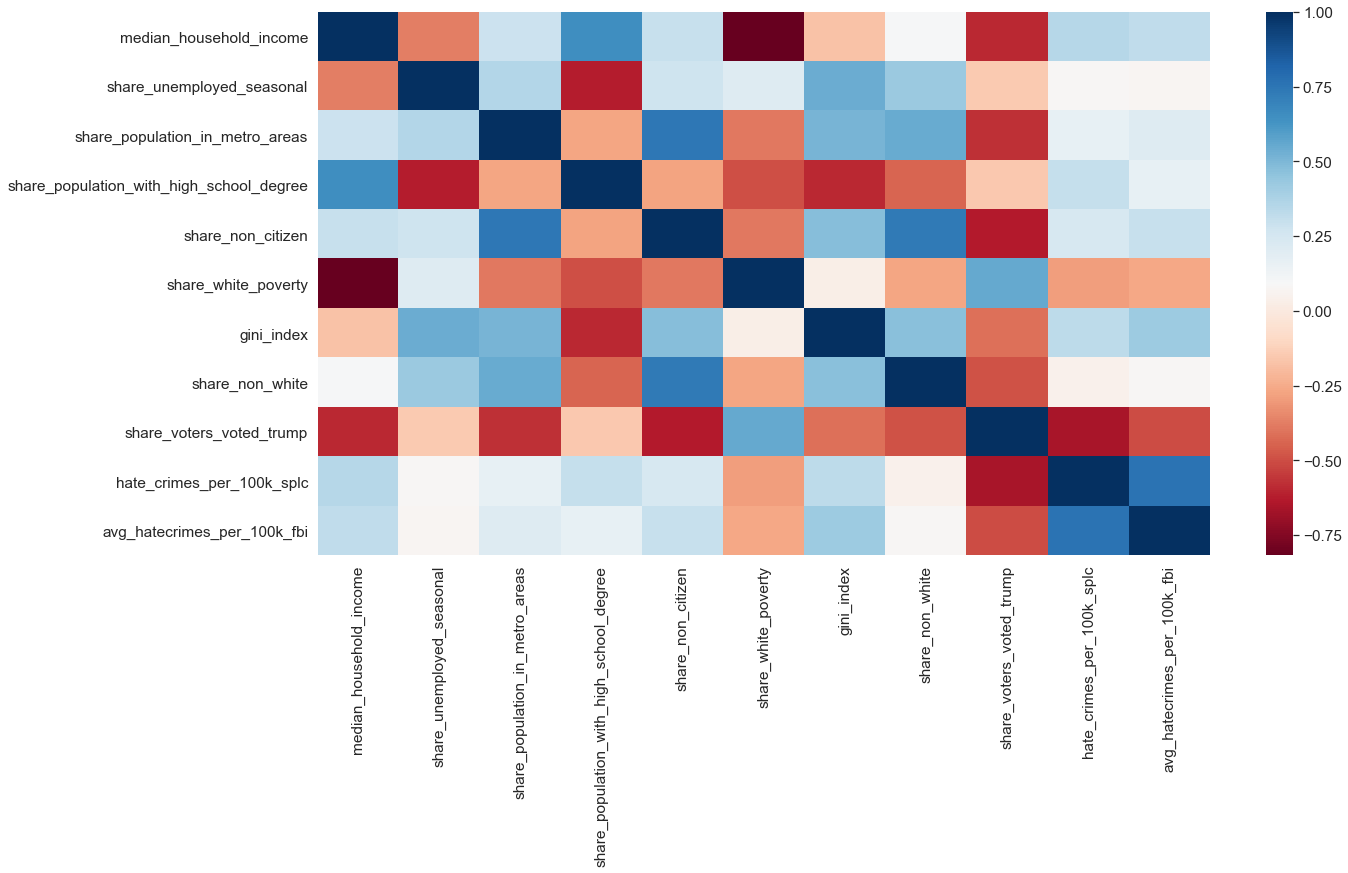

In [111]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c, cmap='RdBu')
plt.show()

### Outliers 

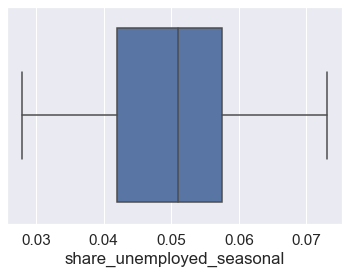

In [65]:
sns.boxplot(x=df["share_unemployed_seasonal"])

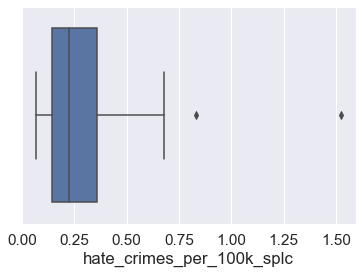

In [66]:
sns.boxplot(x=df["hate_crimes_per_100k_splc"])

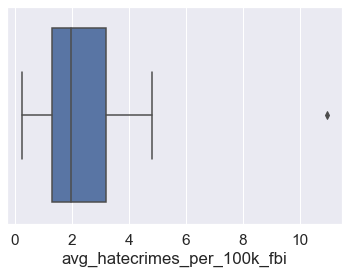

In [67]:
sns.boxplot(x=df["avg_hatecrimes_per_100k_fbi"])

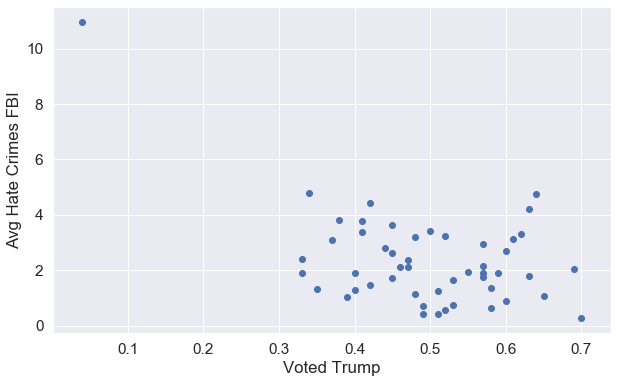

In [83]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["share_voters_voted_trump"], df["avg_hatecrimes_per_100k_fbi"])
ax.set_xlabel("Voted Trump")
ax.set_ylabel("Avg Hate Crimes FBI")
plt.show()

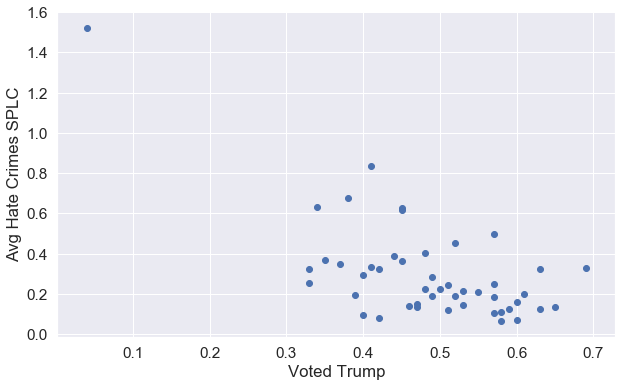

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["share_voters_voted_trump"], df["hate_crimes_per_100k_splc"])
ax.set_xlabel("Voted Trump")
ax.set_ylabel("Avg Hate Crimes SPLC")
plt.show()

## Multiple Linear Regression Analysis

In [48]:
dataset.corr()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.300382,-0.818045,-0.178821,0.103775,-0.597528,0.307757,0.264822
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.294908,0.209440,0.541659,0.431847,-0.148192,0.122300,0.104509
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.737067,-0.385559,0.515843,0.547672,-0.570695,0.175377,0.205912
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.286958,-0.494008,-0.592052,-0.434846,-0.155656,0.254337,0.137016
share_non_citizen,0.300382,0.294908,0.737067,-0.286958,1.000000,-0.384810,0.489549,0.738770,-0.619525,0.201862,0.256404
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.384810,1.000000,0.032584,-0.269449,0.552849,-0.263080,-0.234696
gini_index,-0.178821,0.541659,0.515843,-0.592052,0.489549,0.032584,1.000000,0.468467,-0.411543,0.344187,0.434296
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.738770,-0.269449,0.468467,1.000000,-0.488838,0.014340,0.006320
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.619525,0.552849,-0.411543,-0.488838,1.000000,-0.594690,-0.448481
hate_crimes_per_100k_splc,0.307757,0.122300,0.175377,0.254337,0.201862,-0.263080,0.344187,0.014340,-0.594690,1.000000,0.727204


In [63]:
# uses dataset, given that df does not contain any missing values 
# divide into x= feautures and y = labels 

X = dataset[['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas', 
             'share_population_with_high_school_degree', 'share_non_citizen','share_white_poverty','gini_index','share_non_white',                        
             'share_voters_voted_trump','avg_hatecrimes_per_100k_fbi']].values   


y=dataset[['hate_crimes_per_100k_splc']].values

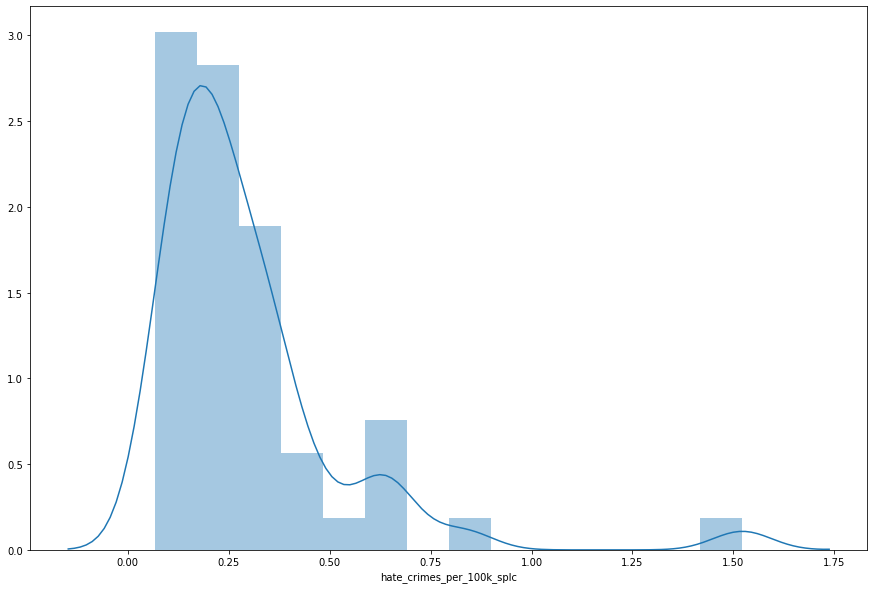

In [64]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['hate_crimes_per_100k_splc'])

In [65]:
# split the data into training and testing set 
# 80 % in training 20% in testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
# train the model 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
#Intercept:

print(regressor.intercept_)


#slope:
print(regressor.coef_)

[0.13714368]
[[-1.00630040e-06  2.32015668e+00 -5.20753140e-01  7.74972409e-01
   3.72550712e-01  5.38845195e-01  1.49843280e+00 -4.27116825e-01
  -1.79170206e+00  4.56552688e-02]]


In [69]:
y_pred = regressor.predict(X_test)

In [70]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.151550,0.417595
1,0.120420,0.300840
2,0.120420,0.124623
3,0.403779,0.351748
4,0.225320,0.235862
5,0.141673,0.249986
6,0.324149,0.877771
7,0.350620,0.505882
8,0.495491,0.487821
9,0.255805,0.393029


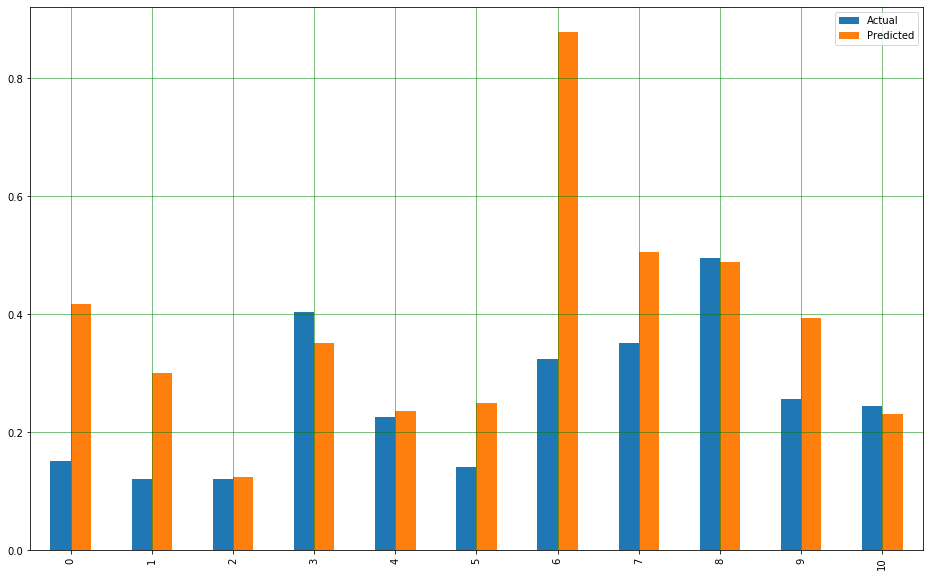

In [71]:
# NOT A GOOD MODEL PREDICITED VALUES TOO HIGH MOST OF THE TIME 

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13525585604976
Mean Squared Error: 0.04250436779614115
Root Mean Squared Error: 0.2061658744703913


In [ ]:
# Inaccuracy due to amount of data, bad assumptions, poor feautures 